In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import scipy.stats as st
from scipy.stats import f_oneway

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.4 

In [20]:
from pycaret.datasets import get_data
df = get_data('bank')

#target valiable == deposit

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


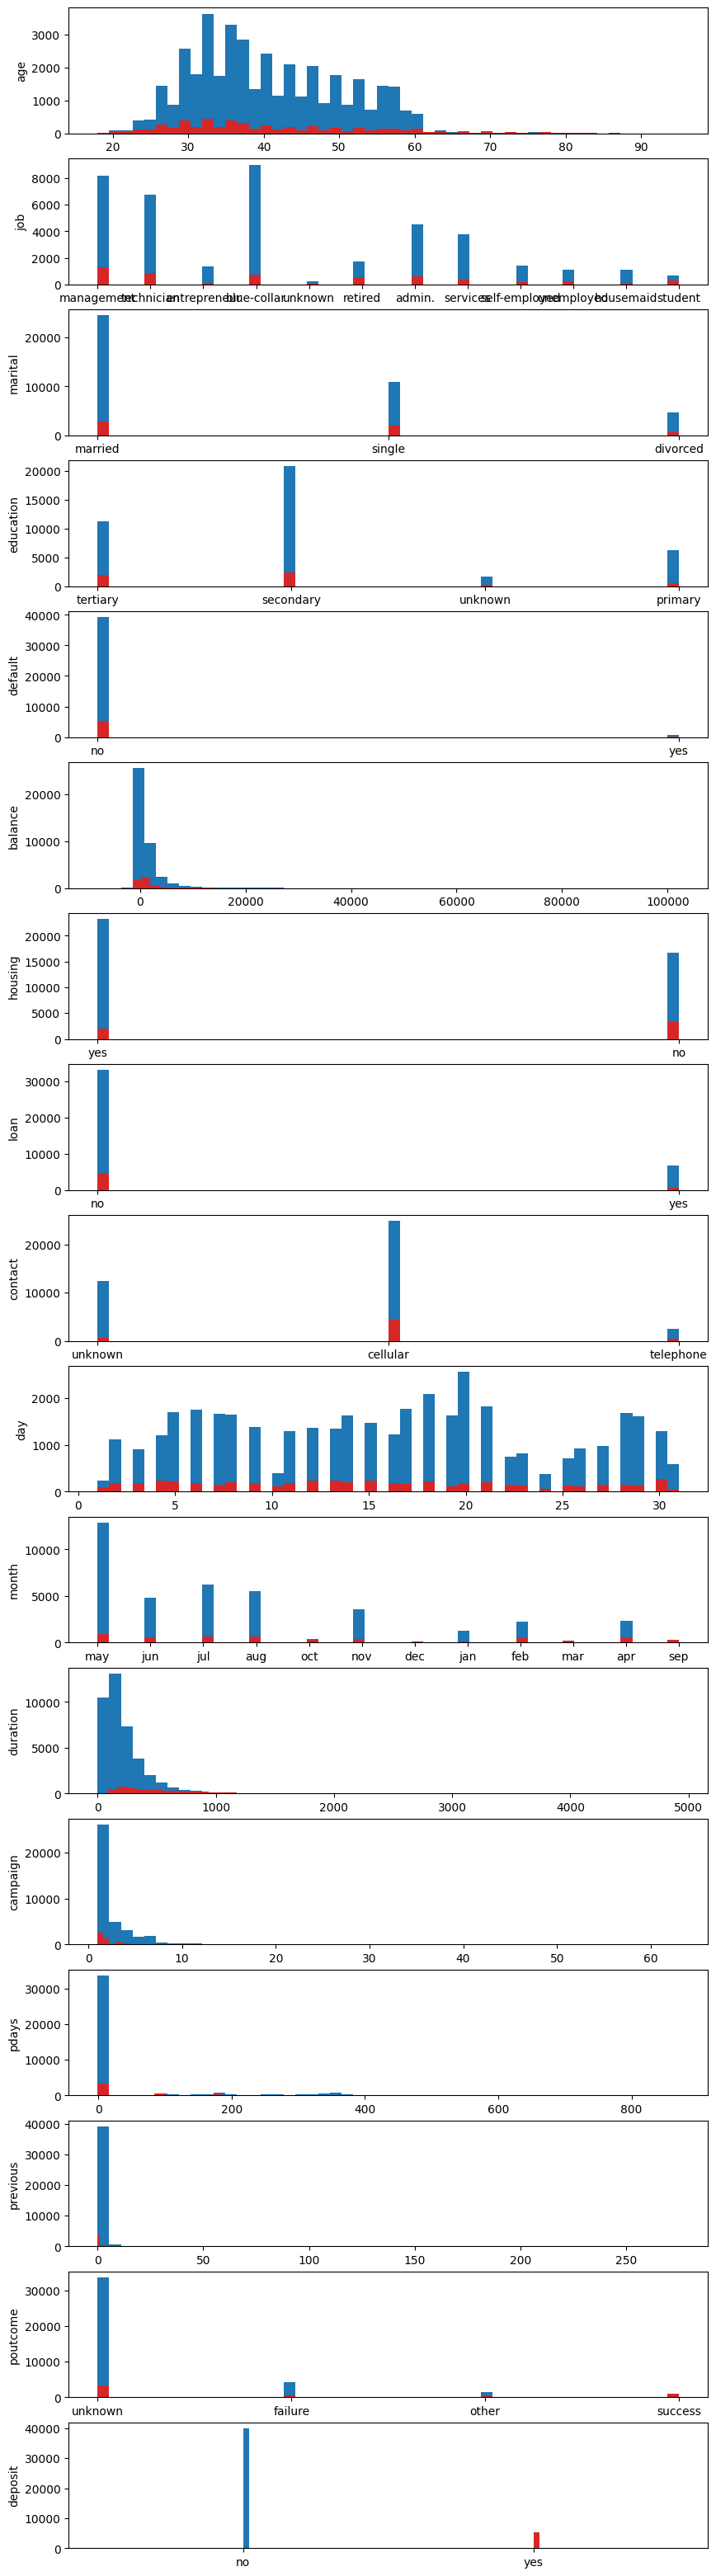

In [32]:
fig, axs = plt.subplots(len(df.columns) , figsize=(10, 40))
i = 0
for column in df.columns:
        axs[i].hist(
            df[column].loc[df['deposit'] == "no"],
            bins = 50
        )
        axs[i].hist(
            df[column].loc[df['deposit'] == "yes"],
            bins = 50,
            color = 'tab:red'
        )
        axs[i].set_ylabel(column)
        i = i + 1

Text(95.72222222222221, 0.5, 'Features')

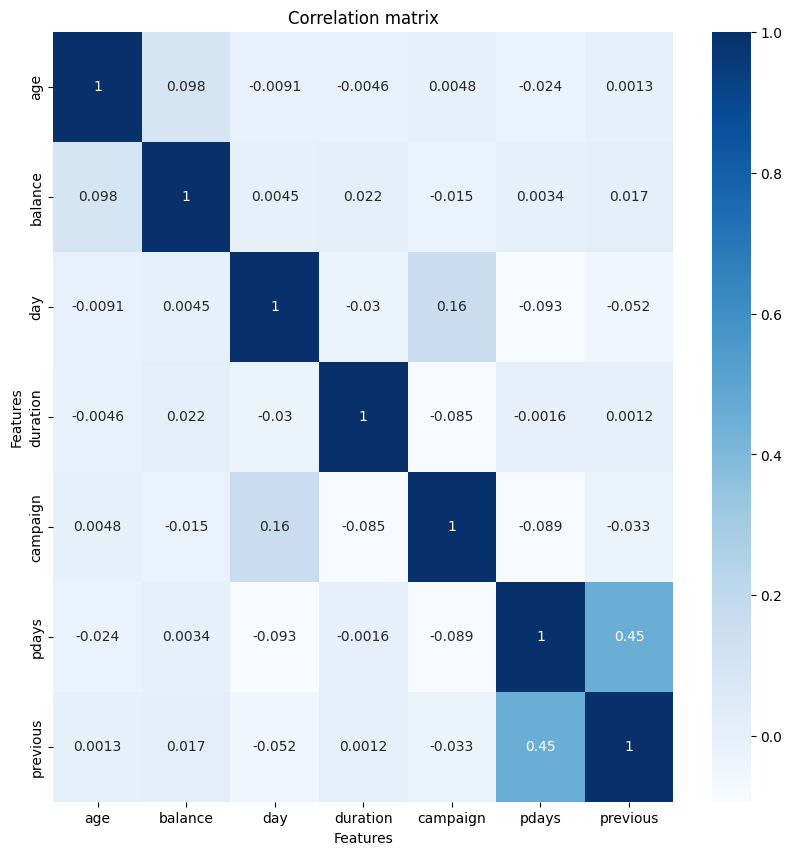

In [43]:
import seaborn as sns
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title('Correlation matrix')
plt.xlabel('Features')
plt.ylabel('Features')

In [46]:
from pycaret.classification import *
s = setup(df, target = 'deposit', session_id = 11)

,Description,Value
0,Session id,11
1,Target,deposit
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Numeric features,7
9,Categorical features,9


In [47]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9084,0.0000,0.9084,0.9005,0.9030,0.5068,0.5125,4.3260
xgboost,Extreme Gradient Boosting,0.9072,0.0000,0.9072,0.8995,0.9022,0.5036,0.5086,1.1920
rf,Random Forest Classifier,0.9061,0.0000,0.9061,0.8935,0.8942,0.4390,0.4612,4.5700
gbc,Gradient Boosting Classifier,0.9055,0.0000,0.9055,0.8937,0.8958,0.4541,0.4694,5.3070
ada,Ada Boost Classifier,0.9006,0.0000,0.9006,0.8873,0.8901,0.4231,0.4385,1.9070
lda,Linear Discriminant Analysis,0.9002,0.0000,0.9002,0.8895,0.8929,0.4496,0.4573,0.6690
lr,Logistic Regression,0.9001,0.0000,0.9001,0.8846,0.8857,0.3884,0.4139,4.7490
et,Extra Trees Classifier,0.8999,0.0000,0.8999,0.8847,0.8864,0.3942,0.4172,4.5610
ridge,Ridge Classifier,0.8991,0.0000,0.8991,0.8824,0.8802,0.3461,0.3860,0.5870
dummy,Dummy Classifier,0.8830,0.0000,0.8830,0.7797,0.8282,0.0000,0.0000,0.6670


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

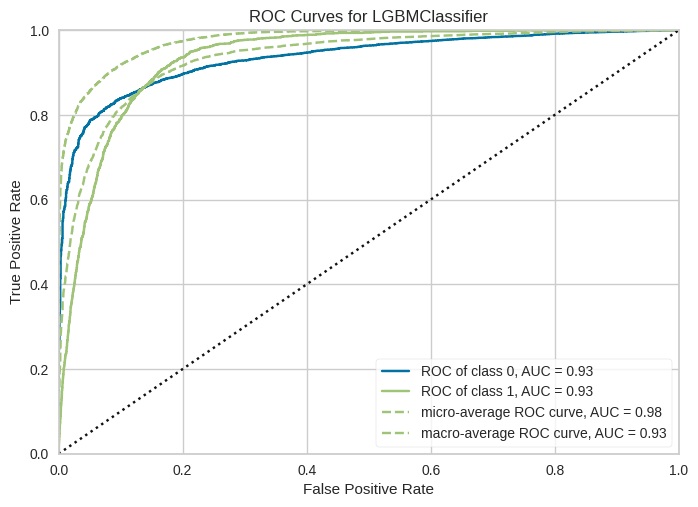

In [48]:
plot_model(best, plot = 'auc')

In [49]:
save_model(best, 'bank_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
        